In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1) Regression avec SkLearn

In [32]:
np.random.seed(0)
m = 100 
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

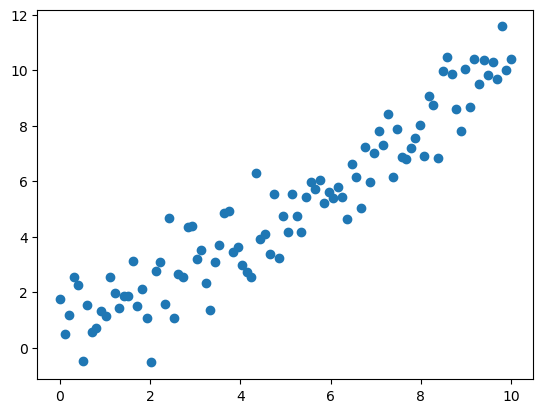

In [34]:
plt.scatter(X,y)

In [36]:
from sklearn.linear_model import LinearRegression

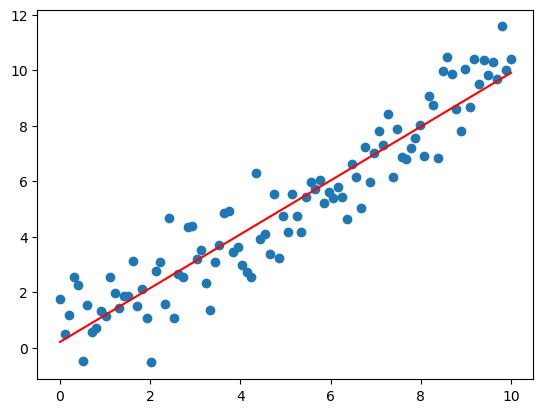

In [38]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions,c="r")

coefficient de determination $R^2$ est = 88% de la methode des moidres carré

# 2) Classification

In [51]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace = True)
titanic['sex'].replace(['male','female'],[0,1],inplace = True)
titanic.head()

C:\Users\ouedr\AppData\Local\Temp\ipykernel_12904\335298148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace = True)
C:\Users\ouedr\AppData\Local\Temp\ipykernel_12904\335298148.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
modelc = KNeighborsClassifier()

In [78]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [80]:
modelc.fit(X,y)
modelc.score(X,y)

0.8417366946778712

In [ ]:
model.predict(X)

In [114]:
def survie( model,pclass=3, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1,3)
    #print(model.predict(x))
    #print(model.predict_proba(x))
    return [model.predict(x),model.predict_proba(x)]
    

In [92]:
survie(modelc,pclass=1,sex=1,age=21)

[1]
[[0.2 0.8]]


C:\Users\ouedr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ouedr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [104]:
model_list = [KNeighborsClassifier(i)for i in range(5)]
model_list

[KNeighborsClassifier(n_neighbors=0),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=2),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=4)]

In [116]:
# Exo
pclass, sex, age= 1,0,21
model_list = [KNeighborsClassifier(i)for i in range(1,5)]
survie_liste = []
y = titanic['survived']
X = titanic.drop('survived', axis=1)
for model in model_list:
    model.fit(X,y)
    model.score(X,y)
    survie = survie(model,pclass, sex, age)
    survie_liste.append(survie)
survie_liste


C:\Users\ouedr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ouedr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: 'list' object is not callable

1


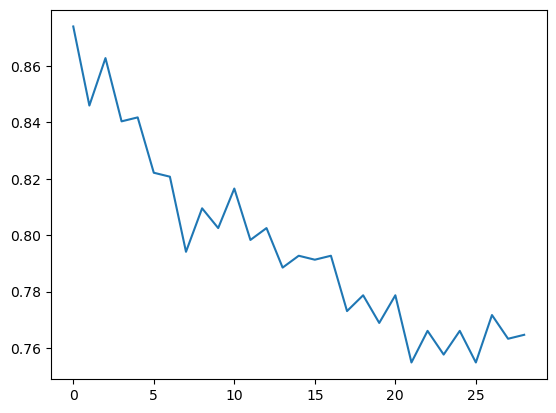

In [130]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)
score = []
best_k = 1
best_score = 0
for k in range(best_k,30):
    model = KNeighborsClassifier(n_neighbors =k)
    model.fit(X,y)
    score.append(model.score(X,y))

    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X,y)
print(best_k)

plt.plot(score)

# Selection de modèle

In [135]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [137]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_tes = train_test_split(X,y,test_size = 0.2)
print('Train set' , X_train.shape)
print('Test set' , X_test.shape)

Train set (571, 3)
Test set (143, 3)


In [159]:
X_train

,pclass,sex,age
57,3,0,28.5
318,1,1,31.0
734,2,0,23.0
215,1,1,31.0
63,3,0,4.0
...,...,...,...
387,2,1,36.0
211,2,1,35.0
135,2,0,23.0
163,3,0,17.0


InvalidIndexError: (slice(None, None, None), 0)

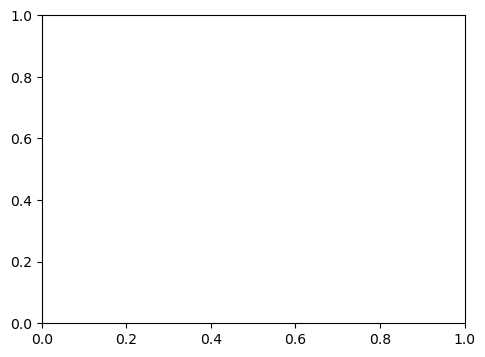

In [149]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train, alpha = 0.8)
plt.title('Train set')

plt.subplot(122)    
plt.scatter(X_test[:,0],X_test[:,1],c = y_test, alpha = 0.8)
plt.title('Test set')